In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [ ]:
diving_data = pd.read_csv("divingParis.csv")
diving_data.head()

,Dive_Order,Diver_Name,Diver_id,Judge1,Judge2,Judge3,Judge4,Judge5,Judge6,Judge7,Difficulty,Position,Round_Score,Round_Number
0,1,Noah Williams,1,8.0,8.0,8.0,8.0,8.5,8.5,9.0,3.2,Tuck,78.4,1
1,2,Oleksii Sereda,2,7.0,7.0,7.0,7.5,7.0,7.0,7.0,3.2,Tuck,67.2,1
2,3,Nathan Murray,3,8.5,8.5,9.0,9.0,8.5,8.0,9.0,3.2,Tuck,83.2,1
3,4,Timo Barthel,4,7.5,7.5,7.5,7.0,7.0,7.5,7.0,3.2,Tuck,70.4,1
4,5,Kevin Berlin Reyes,5,7.0,7.0,6.5,7.5,6.5,7.0,6.5,3.2,Tuck,65.6,1


In [ ]:
# Extracting scores for each judge
judges = [col for col in diving_data.columns if col.startswith('Judge')]

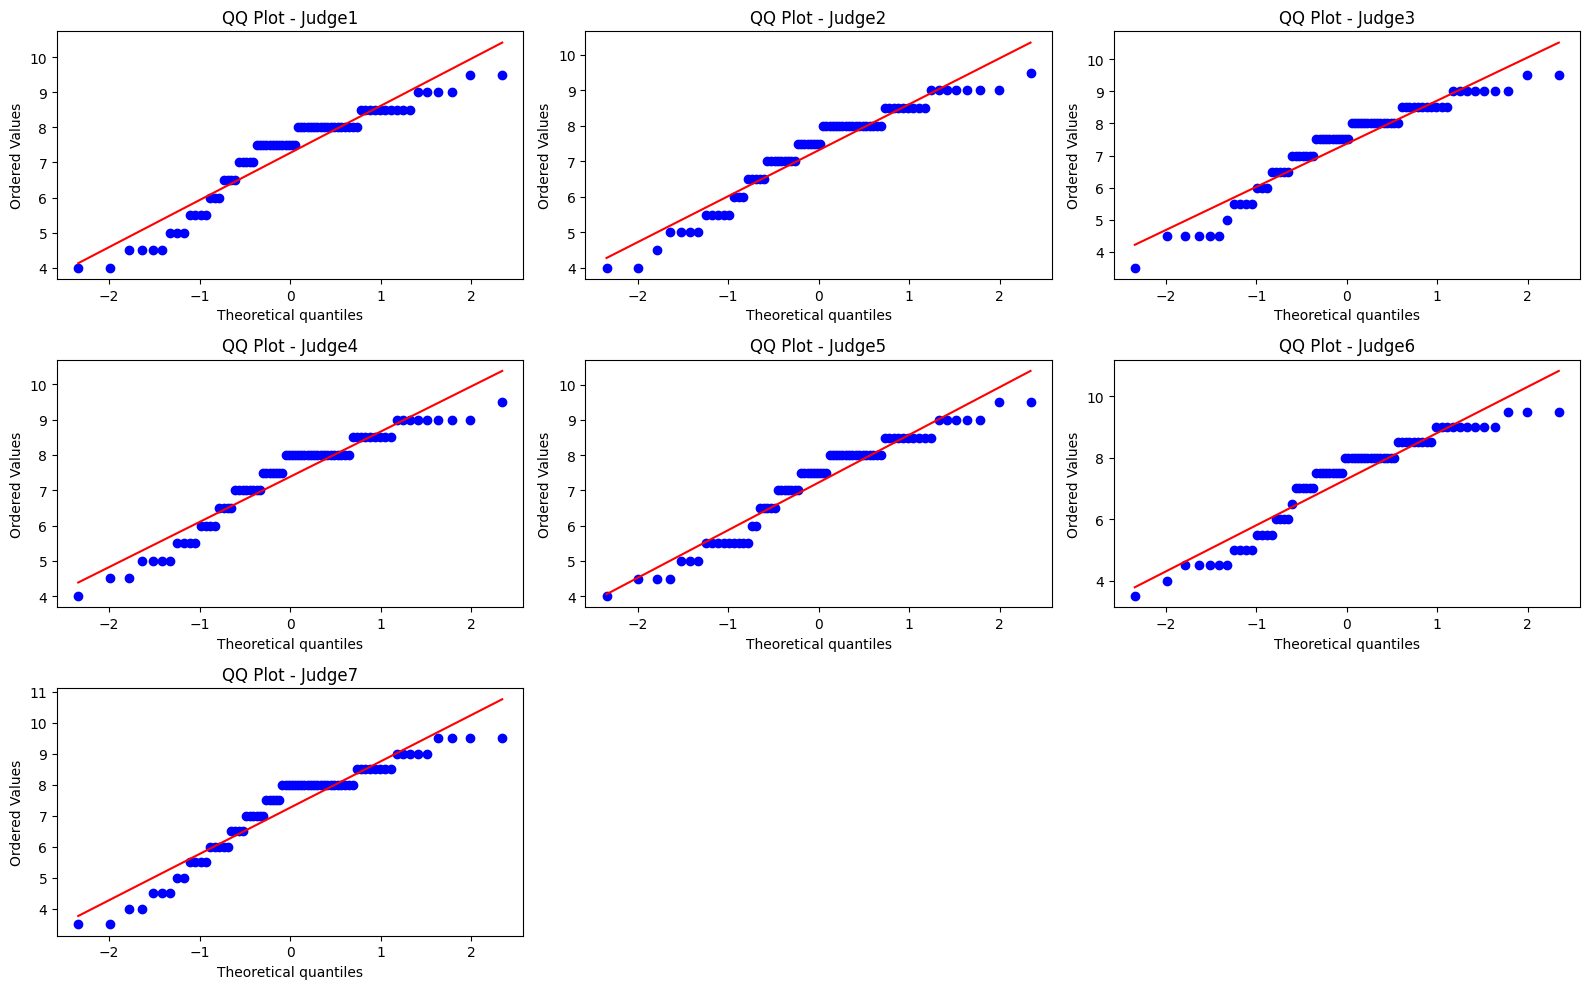

In [ ]:
# Create QQ plots for each judge's scores
plt.figure(figsize=(16, 10))
for i, judge in enumerate(judges, 1):
    plt.subplot(3, 3, i)
    stats.probplot(diving_data[judge].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot - {judge}")

plt.tight_layout()
plt.show()

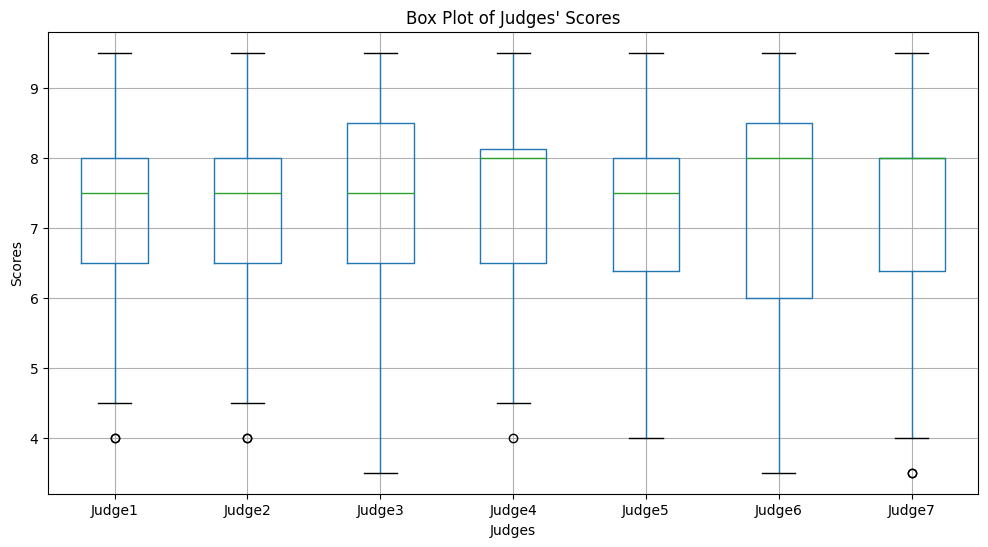

In [ ]:
# Create box plots for all judges to compare score distributions
plt.figure(figsize=(12, 6))
diving_data[judges].boxplot()
plt.title("Box Plot of Judges' Scores")
plt.ylabel("Scores")
plt.xlabel("Judges")
plt.show()

In [ ]:
kendall_correlation_matrix = diving_data[judges].corr(method='kendall')


Text(95.72222222222221, 0.5, 'Judges')

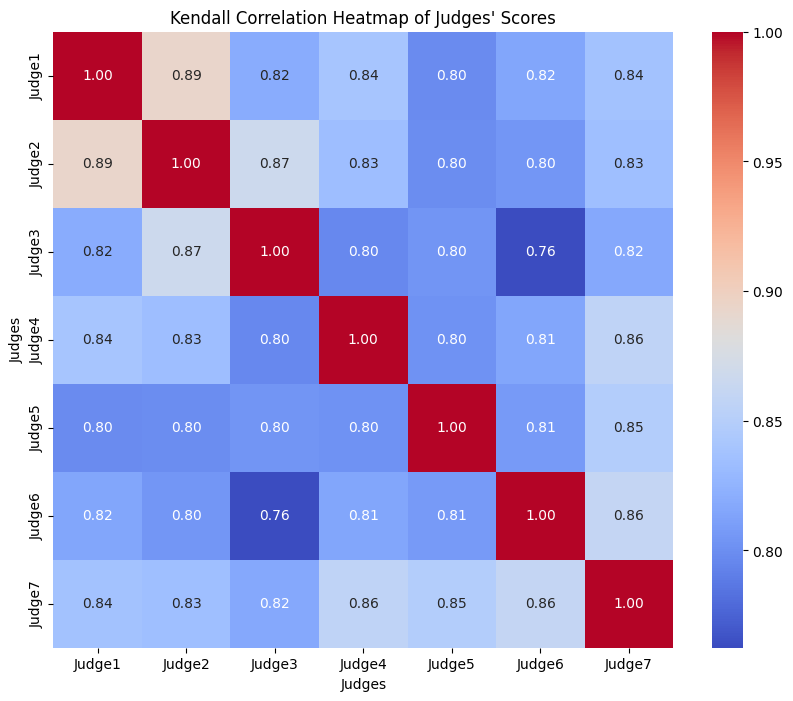

In [ ]:
# Display the Kendall correlation matrix
#tools.display_dataframe_to_user(name="Kendall Correlation Matrix of Judges' Scores", dataframe=kendall_correlation_matrix)

# Generate and save the heatmap for Kendall correlation
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Kendall Correlation Heatmap of Judges' Scores")
plt.xlabel("Judges")
plt.ylabel("Judges")

In [ ]:
from scipy.stats import f_oneway
# Extract scores grouped by judge for ANOVA
judges = [col for col in diving_data.columns if col.startswith('Judge')]
grouped_scores = [diving_data[judge].dropna() for judge in judges]

f_statistic, p_value = f_oneway(*grouped_scores)
# Display the results
anova_results = {
    "F-Statistic": f_statistic,
    "p-Value": p_value
}
print(anova_results)

{'F-Statistic': 0.1195574134429172, 'p-Value': 0.9940558344248572}


In [ ]:

import pandas as pd
import statsmodels.formula.api as smf


# Reload the dataset

diving_data = pd.read_csv("divingParis.csv")

# Identify judges
judges = [col for col in diving_data.columns if col.startswith('Judge')]

# Compute the total score for each diver across all judges
diving_data['Total_Score'] = diving_data[judges].sum(axis=1)

# Encode the previous diver as a categorical variable
diving_data['Previous_Diver'] = diving_data['Diver_Name'].shift(1)

# Drop rows with NaN values in Previous_Diver column
diving_data_lagged = diving_data.dropna(subset=['Previous_Diver'])

# Fit a mixed-effects model with Previous_Diver as a fixed effect and Round_Number as a random effect
model = smf.mixedlm("Total_Score ~ C(Previous_Diver)",
                    diving_data_lagged,
                    groups=diving_data_lagged["Round_Number"])
mixed_model_fit = model.fit()

# Summarize the results
mixed_model_summary = mixed_model_fit.summary()

# Display the results
print(mixed_model_summary)

In [ ]:

import pandas as pd
import statsmodels.formula.api as smf




judges = [col for col in diving_data.columns if col.startswith('Judge')]


diving_data['Total_Score'] = diving_data[judges].sum(axis=1)

# Encode the previous diver and round as categorical variables
diving_data['Previous_Diver'] = diving_data['Diver_Name'].shift(1)
diving_data_lagged = diving_data.dropna(subset=['Previous_Diver'])

#mixed-effects model with Previous Diver and Round Number as fixed effects
mixed_model = smf.mixedlm(
    "Total_Score ~ C(Previous_Diver) + C(Round_Number)",  # Previous diver effects
    diving_data_lagged,
    groups=diving_data_lagged["Round_Number"]  #effects for round grouping
)
mixed_model_fit = mixed_model.fit()
# Summarize the results
print(mixed_model_fit.summary())